# Intro

- Student name: Cristina Townsend 
- Student pace: part time
- Scheduled project review date/time: Tuesday 9 March 2021
- Instructor name: Yish
- Presentation URL: https://docs.google.com/presentation/d/1GBIDcoWRSymL6ODu75fAkLZpDEeFKhg4JmfWZICUUB0/edit#slide=id.p

## Business Case:


In this notebook we aim to answer the following questions using real-estate data from Zillow:
- Which Portland zipcodes should we focus on when deciding to invest in real-estate?
- Which of our focus zipcodes have the highest ROI potential?
- Which of our focus zipcodes have the lowest risk?

# Load the Data/Filtering for Chosen Zipcodes

First we import libraries we will need to load, process, and plot our data.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas.tseries
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

We load the data, ensure it loaded correctly, and take a quick look at .info() to see what we will be working with in this dataframe.

In [2]:
# load dataframe and print head to ensure it loaded correctly
df = pd.read_csv('zillow_data2.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,241494.0,...,1184447.0,1173676.0,1168681.0,1163918.0,1160819.0,1160123.0,1152662.0,1144433.0,1134469.0,1119691.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,203617.0,...,476309.0,476561.0,477007.0,478256.0,480236.0,482968.0,485700.0,488346.0,490977.0,493431.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,208136.0,...,1027995.0,1031797.0,1034790.0,1034950.0,1038246.0,1049714.0,1051969.0,1049421.0,1042315.0,1042278.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200011.0,...,336436.0,337509.0,338366.0,339073.0,340411.0,341809.0,344034.0,346734.0,350619.0,354287.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,276628.0,...,620228.0,619997.0,619999.0,621109.0,622569.0,625369.0,628093.0,631084.0,634026.0,636670.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30329 entries, 0 to 30328
Columns: 310 entries, RegionID to 2021-01
dtypes: float64(301), int64(3), object(6)
memory usage: 71.7+ MB


Now that we have a basic idea of the data, we need to start filtering for Portland, Oregon. Since there are multiple Portlands in the United States, we will first drop any rows that are outside or Oregon.

In [4]:
df_or = df.copy()
df_or = df_or[df_or.State == 'OR']
df_or.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
140,99142,142,97229,Zip,OR,OR,Portland,Portland-Vancouver-Hillsboro,Multnomah County,221270.0,...,596116.0,598702.0,600036.0,602351.0,605526.0,610575.0,615934.0,622193.0,627338.0,631184.0
326,99252,330,97402,Zip,OR,OR,Eugene,Eugene,Lane County,114824.0,...,290484.0,292751.0,294136.0,296411.0,299385.0,303530.0,307319.0,311811.0,315889.0,320744.0
480,99048,485,97045,Zip,OR,OR,Oregon City,Portland-Vancouver-Hillsboro,Clackamas County,168157.0,...,449636.0,452775.0,455229.0,457580.0,460562.0,464170.0,466784.0,470199.0,472145.0,473341.0
522,99251,527,97401,Zip,OR,OR,Eugene,Eugene,Lane County,150610.0,...,385398.0,387962.0,389330.0,391719.0,394454.0,398776.0,402576.0,407562.0,412029.0,417601.0
598,99093,604,97124,Zip,OR,OR,Hillsboro,Portland-Vancouver-Hillsboro,Washington County,156815.0,...,425706.0,427744.0,428605.0,430381.0,432642.0,436783.0,441319.0,446558.0,451006.0,454463.0


Now we can create our Portland dataframe.

In [5]:
df_port = df_or.copy()
df_port = df_port[df_port.City == 'Portland']
df_port.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
140,99142,142,97229,Zip,OR,OR,Portland,Portland-Vancouver-Hillsboro,Multnomah County,221270.0,...,596116.0,598702.0,600036.0,602351.0,605526.0,610575.0,615934.0,622193.0,627338.0,631184.0
685,99120,691,97206,Zip,OR,OR,Portland,Portland-Vancouver-Hillsboro,Multnomah County,102538.0,...,402557.0,405537.0,408419.0,412400.0,416710.0,422433.0,427203.0,431376.0,434746.0,438932.0
1104,99116,1114,97202,Zip,OR,OR,Portland,Portland-Vancouver-Hillsboro,Multnomah County,145404.0,...,541827.0,545446.0,549224.0,555015.0,561030.0,568278.0,574194.0,579849.0,584863.0,590615.0
1569,99133,1585,97219,Zip,OR,OR,Portland,Portland-Vancouver-Hillsboro,Multnomah County,171425.0,...,516028.0,519940.0,523367.0,527905.0,532300.0,538453.0,543489.0,548485.0,552240.0,556945.0
1797,99131,1813,97217,Zip,OR,OR,Portland,Portland-Vancouver-Hillsboro,Multnomah County,95801.0,...,456930.0,460196.0,464092.0,468836.0,473885.0,479967.0,485115.0,490482.0,494760.0,500287.0


We can drop ['City','State', 'StateName', 'Metro', 'SizeRank', 'CountyName', 
                     'RegionID', 'RegionType'] columns since all the data in those columns are either repetitive or irrelevant. 

In [6]:
df_port.drop(labels=['City','State', 'StateName', 'Metro', 'SizeRank', 'CountyName', 
                     'RegionID', 'RegionType'], axis=1, inplace=True)

In [7]:
df_port['RegionName'].nunique()

28

# Data Preprocessing

Reshape the dataframe from Wide to Long Format so the dates and average prices become columns. Then we examine and process the dataframe

In [8]:
df_portmelt = df_port.melt( 
            id_vars=['RegionName'],
            var_name='Date', 
            value_name='Avg_Price')
df_portmelt.head()


,RegionName,Date,Avg_Price
0,97229,1996-01,221270.0
1,97206,1996-01,102538.0
2,97202,1996-01,145404.0
3,97219,1996-01,171425.0
4,97217,1996-01,95801.0


In [9]:
df_portmelt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 3 columns):
RegionName    8428 non-null int64
Date          8428 non-null object
Avg_Price     8428 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 197.6+ KB


In [10]:
# Convert Date to datetime
df_portmelt['Date'] = pd.to_datetime(df_portmelt['Date'], format='%Y-%m')


# Convert RegionName to string as it will be used catergorical not quantatively
df_portmelt['RegionName'] = 'zip: ' + df_portmelt['RegionName'].astype(str)

df_portmelt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 3 columns):
RegionName    8428 non-null object
Date          8428 non-null datetime64[ns]
Avg_Price     8428 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 197.6+ KB


In [11]:
# ensure it worked as intended
df_portmelt.head()

,RegionName,Date,Avg_Price
0,zip: 97229,1996-01-01,221270.0
1,zip: 97206,1996-01-01,102538.0
2,zip: 97202,1996-01-01,145404.0
3,zip: 97219,1996-01-01,171425.0
4,zip: 97217,1996-01-01,95801.0


Quickly check for null values but from the examination of .info() above, there should not be any. 

In [12]:
df_portmelt.isnull().sum()

RegionName    0
Date          0
Avg_Price     0
dtype: int64

## Initial EDA

The first plot we will look at is a plot of the average price of homes from all zipcodes in Portland through the years.

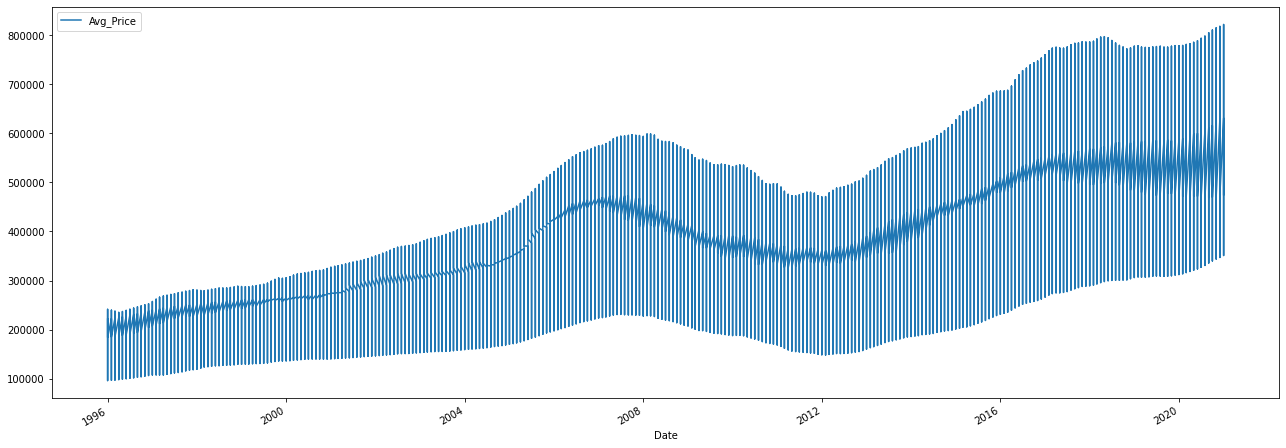

In [13]:
df_portmelt.plot(x='Date', y='Avg_Price', figsize = (22,8))
plt.show()

With this initial graph, we can see the overall pattern of all Portland throughout the years. We can see there is a general upward trend with a drop off in 2008 to 2012  which is indicative of the 2008 recession. 

Next we are will look at boxplots of average price per zipcode. Before we plot the data, we need to group by zipcode (the "RegionName" zipcode).

In [14]:
# Create df to sort boxplot by median
grouped = df_portmelt.groupby(["RegionName"])

df2 = pd.DataFrame({col:vals['Avg_Price'] for col,vals in grouped})

# Sort medians from high to low
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

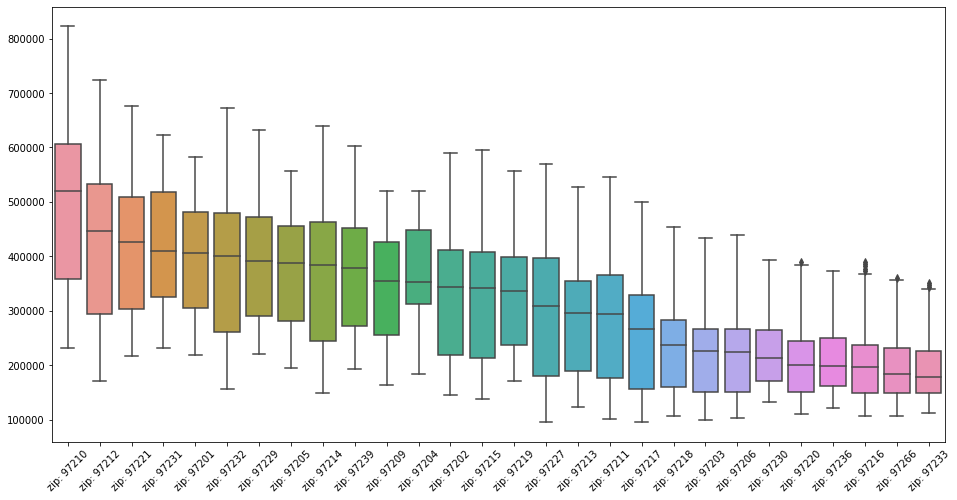

In [15]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Next we will look at a plot of the average price per zipcode through the years.

<AxesSubplot:xlabel='Date', ylabel='Avg_Price'>

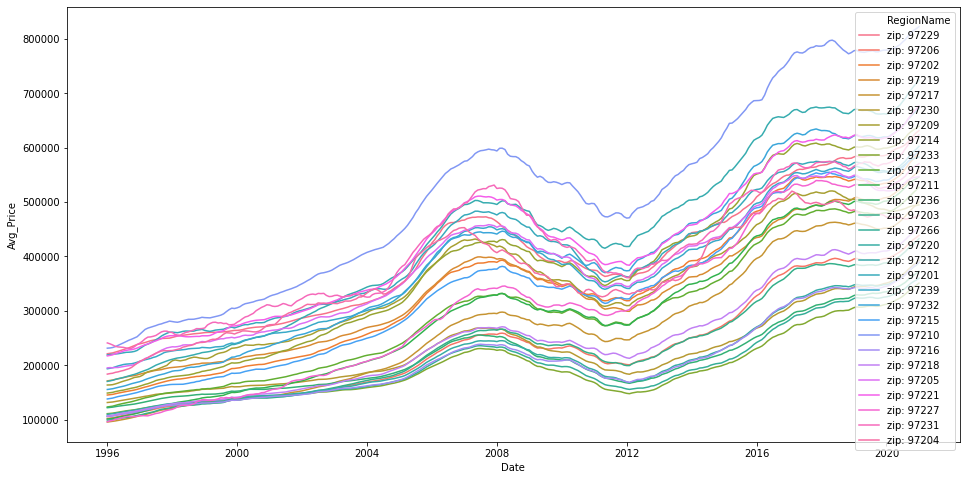

In [16]:
import matplotlib.dates as mdates
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_portmelt, x='Date', y='Avg_Price', hue='RegionName')

From the two plots above, we can see that 97210 is has a higher average price than the rest of the zipcodes in Portland. We can also see that all zipcodes follow the same trend due to the recession in 2008. 

In [17]:
zip_list = list(df_portmelt['RegionName'].unique())
# zip_list

In order to get a better look at the ranges and medians for the individual zipcodes. We will look at the top 5 of each to decide which we will focus on.

In [18]:
# Create a DataFrame of range of the prices per zipcode
range_list = []

for x in zip_list:
    temp = df2[x].max() - df2[x].min()
    range_list.append(
                {'Zipcode': x,
                'Range': temp})
    
range_df = pd.DataFrame(range_list)
range_df

range_df = range_df.sort_values('Range', ascending=False)
print(f'Top 5 ranges: \n{range_df.head()}')
print(f'\nTop 5 medians: \n{meds.head()}')

Top 5 ranges: 
       Range     Zipcode
20  590763.0  zip: 97210
15  553765.0  zip: 97212
18  517222.0  zip: 97232
7   490296.0  zip: 97214
25  474070.0  zip: 97227

Top 5 medians: 
zip: 97210    519076.0
zip: 97212    446263.0
zip: 97221    425618.0
zip: 97231    409086.0
zip: 97201    406364.0
dtype: float64


We'll focus on the three highest median average prices and four largest ranges.

- 97210 (highest med and range)
- 97212 (2nd highest med and range)
- 97221 (3rd highest med)
- 97232 (3rd highest range)
- 97914 (4th highest range)


In [19]:
zip_focus = ['zip: 97210', 'zip: 97212', 'zip: 97232', 'zip: 97214', 'zip: 97221']

Group the dataframe so we will be able to create individual zipcode dataframes.

In [20]:
temp = df_portmelt.copy()
temp = temp.groupby('RegionName')
temp.first()

,Date,Avg_Price
RegionName,,
zip: 97201,1996-01-01,219094.0
zip: 97202,1996-01-01,145404.0
zip: 97203,1996-01-01,99409.0
zip: 97204,1996-01-01,183837.0
zip: 97205,1996-01-01,195339.0
zip: 97206,1996-01-01,102538.0
zip: 97209,1996-01-01,163810.0
zip: 97210,1996-01-01,231512.0
zip: 97211,1996-01-01,101364.0


In [21]:
# Quick check
temp.get_group(zip_focus[0]).head()


,Avg_Price,Date
20,231512.0,1996-01-01
48,231908.0,1996-02-01
76,232733.0,1996-03-01
104,234455.0,1996-04-01
132,236666.0,1996-05-01


In [22]:
# Set dataframes that we will be running models on

df_97210 = temp.get_group(zip_focus[0])
df_97212 = temp.get_group(zip_focus[1])
df_97232 = temp.get_group(zip_focus[2])
df_97214 = temp.get_group(zip_focus[3])
df_97221 = temp.get_group(zip_focus[4])  

# Functions

## train_test_split
Will split data fed into the function into 90/10 train/test ratio. 

It returns train and test datasets and plots the break up.

In [23]:
def train_test_split(data):
    """Returns train, test data points
    data split into .90 train and .10 test """
    
    X = data
    train_size = int(len(X) * 0.90)
    train, test = X[0:train_size], X[train_size:len(X)]
    print('Observations: %d' % (len(X)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.plot(train)
    plt.plot(test)
    plt.title("Train/Test Breakup")
    plt.show()
    return train, test

## arma_prep
Prepares datasets to be run on the arma model. It includes performing .diff() to detrend the data, printing histogram before and after detrending the data. 

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

def arma_prep(zipcode):
    """Prep for arma modeling and plot histogram, acf, pacf, 
    and autocorrelation. Returns data_diff"""
    
    # grab zipcode from grouped dataframe
    df = temp.get_group(zipcode)
    
    # Set index to the date
    df.set_index('Date', inplace=True)
    # Print histagram before differancing 
    df.hist(grid=False)
    plt.title("Before Differancing")
    
    #Histogram after differencing
    temp1_diff = df.diff().dropna()
    temp1_diff.hist(grid=False)
    plt.title("After Differancing")
    
    # ACF, PACF, and Auto-correclation
    fig, ax = plt.subplots(figsize=(16,3))
    plot_acf(temp1_diff, ax=ax);

    fig, ax = plt.subplots(figsize=(16,3))
    plot_pacf(temp1_diff, ax=ax);
    
    plt.figure(figsize=(12,5))
    pd.plotting.autocorrelation_plot(df)
    return temp1_diff

## arma model 
Inputs order into arma model and fits the model. It then plots the prediction vs the true values.

In [43]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

def model_arma(train, data):
    
    # Fit an ARMA(1,0) model
    mod_arma = ARMA(train, order=(1,0))
    res_arma = mod_arma.fit()

    # Print out summary information on the fit
    print(f"ARMA (1,0)Summary:\n\n{res_arma.summary()}\n\n")
    
    # Fit an ARMA(2,1) model
    mod_arma2 = ARMA(train, order=(2,1))
    res_arma2 = mod_arma.fit()

    # Print out summary information on the fit
    print(f"ARMA (2,1) Summary:\n\n{res_arma.summary()}\n\n")
    
        
    # Get predictions starting from 2018-07-01 and calculate confidence intervals
    
    print("ARMA prediction vs true values")
    pred = res_arma2.predict(start=pd.to_datetime('2018-07-01'), 
                                 end=pd.to_datetime('2021-01-01'), dynamic=False)

    # Plot real vs predicted values along with confidence interval

#     rcParams['figure.figsize'] = 15, 6

    # Plot observed values
    ax = data['2010':].plot(label='observed')
    
    # Plot predicted values
    pred.plot(ax=ax, label='Avg_Predicted', alpha=0.9)

    
    return 

## best_pdq
Calculates and displays the best pdq and pdqs for the data. 

In [26]:
import time
warnings.simplefilter('once', category=UserWarning)

# Function to find best pdq, pdqs

def best_pdq(data, upper_range):
    '''Runs through all possible iterations of pdq to return the one with the
    best AIC'''
    start = time.time()
    # Define the p, d and q parameters to take any value between 0 and 4
    p = d = q = range(0, upper_range)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
                
        # Find the parameters with minimal AIC value
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    end = time.time()
    print(f"Runtime: {end - start}")
    return ans_df.loc[ans_df['aic'].idxmin()]

## arima model
- This function prepares the data for the model by splitting the data 90/10 into train and test data sets. It then plots the split. 
- It then inputs the given parameters and the train data into the ARIMA model.
- It fits the model and prints the results.
- Next it runs and plots model diagnostics
- It runs predictions and compares it to the test data.
- Calculates and returns the rsme
- Forecasts 72 months out using the model and plots the forecast.


In [136]:
import statsmodels as sms
from math import sqrt
from sklearn.metrics import mean_squared_error

# Plug the optimal parameter values into a new SARIMAX model
def arima(data, series_order, season_order):
    '''Train-Test Splits and Runs ARIMA model for series and pdq entered. 
    Prints results plot_diagnostics, and mse.
    Returns rmse and 72 steps out forecast confidense intervals as dataframe'''
    
    # Train-test split 90/10
    X = data
    train_size = int(len(X) * 0.90)
    train, test = X[0:train_size], X[train_size:len(X)]
    print('Observations: %d' % (len(X)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.plot(train)
    plt.plot(test)
    plt.title("Train/Test Breakup")
    plt.show()

    # Plug the parameter values into the model
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(train, 
                                        order=series_order, 
                                        seasonal_order=season_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()
    print(output.summary().tables[1])
    output.plot_diagnostics(figsize=(12, 15))
    plt.show()
    
    # Get predictions starting from 2018-07-01 and calculate confidence intervals
    pred = output.get_prediction(start=pd.to_datetime('2018-07-01'), 
                                 end=pd.to_datetime('2021-01-01'), dynamic=False)
    pred_conf = pred.conf_int()
    
    # Plot real vs predicted values along with confidence interval

    rcParams['figure.figsize'] = 10, 6

    # Plot observed values
    ax = data['2010':].plot(label='observed')
    
    # Plot predicted values
    pred.predicted_mean.plot(ax=ax, label='Avg_Predicted', alpha=0.9)

    # Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=0.5)
    
    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Avg_Price')
    plt.legend()

    plt.show()

    # Calculate rmse

    # Get the real and predicted values
    temp_pred = pred.predicted_mean
    temp_truth = test['2018-07-01':]
    temp_truth2 = temp_truth['Avg_Price'].resample('MS')

    # Compute the mean square error
    mse = ((temp_pred - temp_truth2) ** 2).mean()
    rmse = np.sqrt(mse)
    
    print('The MSE of our predictions is {}'.format(round(mse, 2)))
    print('The RMSE of our predictions is {}'.format(round(rmse, 2)))

    
    # Get forecast 72 steps ahead in future (6 years)
    forecast = output.get_forecast(steps=72)

    # Get confidence intervals of forecasts
    forecast_conf = forecast.conf_int()

    
    # Plot future predictions with confidence intervals
    ax = data.plot(label='observed', figsize=(15, 7))
    forecast.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='k', alpha=0.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Avg_Price')

    plt.legend()
    plt.show()
    

    return rmse, forecast_conf

## ROI 
This function calculates and the ROI based on the forecast in the ARIMA model. It plots and returns ROI as a dataframe.



In [96]:
def ROI(forecast, original_data, date_purchased):
    '''Calculates and returns ROI (Return on Investment). 
    Prints plot of ROI vs Date. date_purchased must be inputed in quotes'''
    
    # Calculate ROI based on the forecast data from the models
    forecast_mean = forecast["2021-02-01":].mean(axis=1)
    bought = original_data['Avg_Price'][date_purchased]
    ROI = (((forecast_mean-bought)/bought) * 100).round(2)
    
    # Plot ROI
    ax = ROI.plot(label='observed', figsize=(6,4))

    ax.set_xlabel('Date')
    ax.set_ylabel('ROI')

    plt.legend()
    plt.show()
    
    return ROI

# Histograms, Autocorrelation, and Partial Autocorrelation

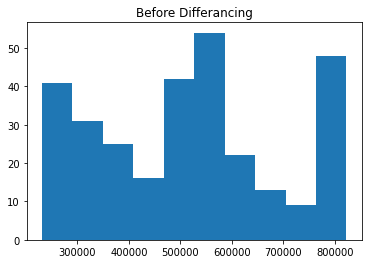

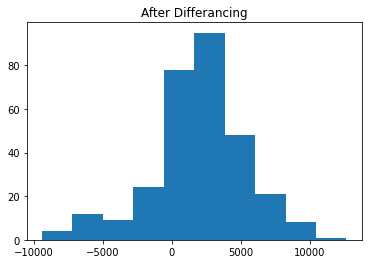

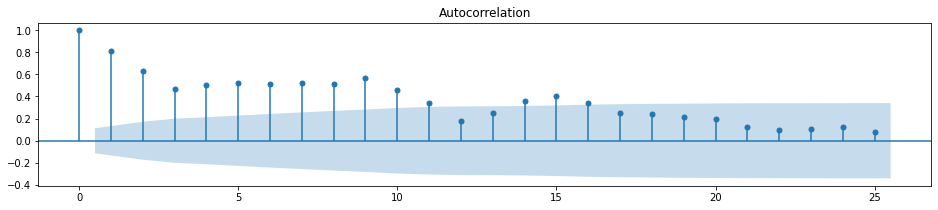

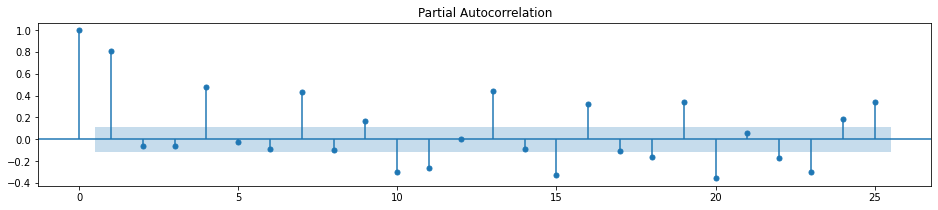

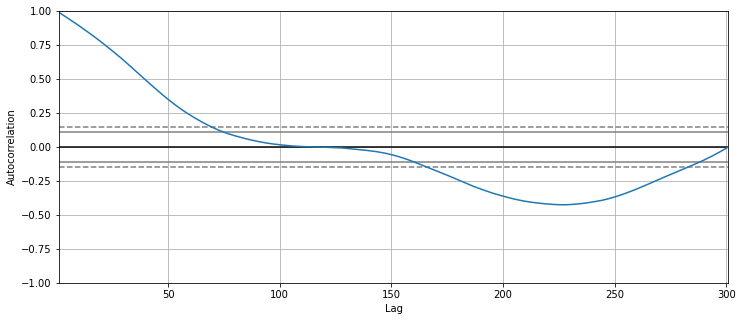

In [29]:
# ARMA prep, differancing, autocorrelation, and partial autocorrelation for zipcode: 97210
arma_97210 = arma_prep('zip: 97210')

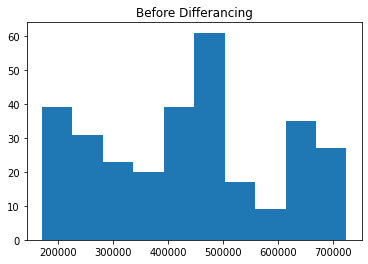

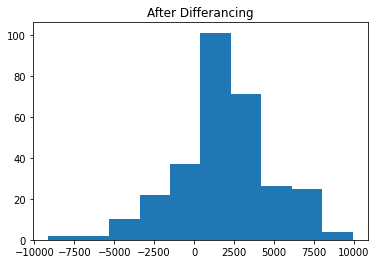

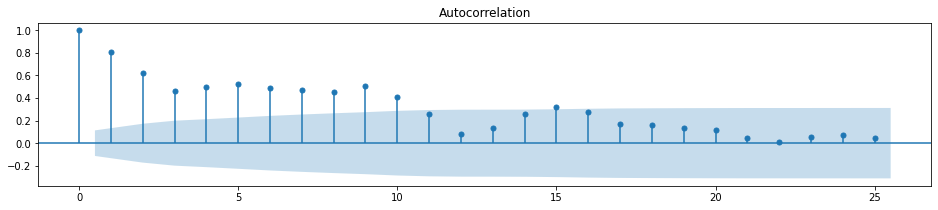

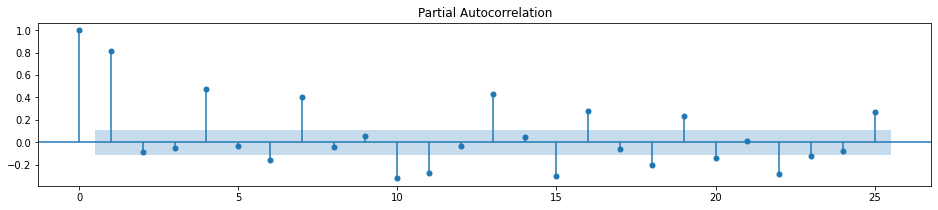

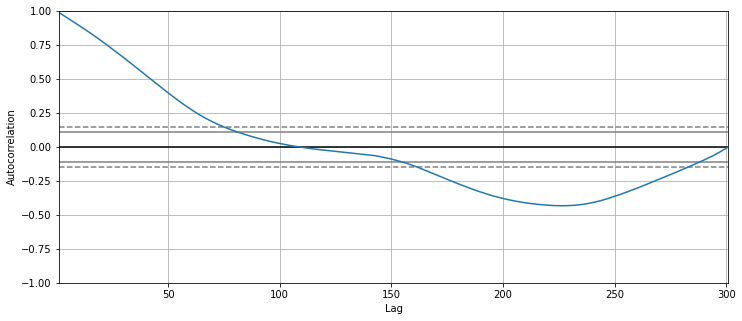

In [30]:
# ARMA prep, differancing, autocorrelation, and partial autocorrelation for zipcode: 97212
arma_97212 = arma_prep('zip: 97212')

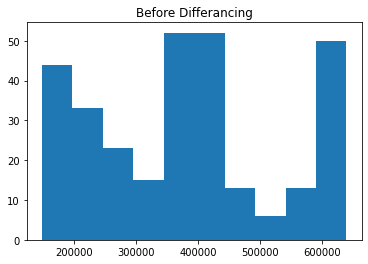

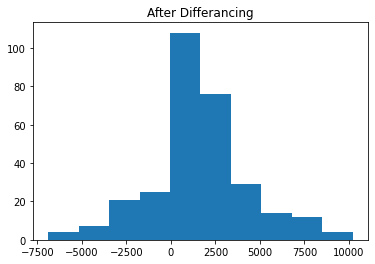

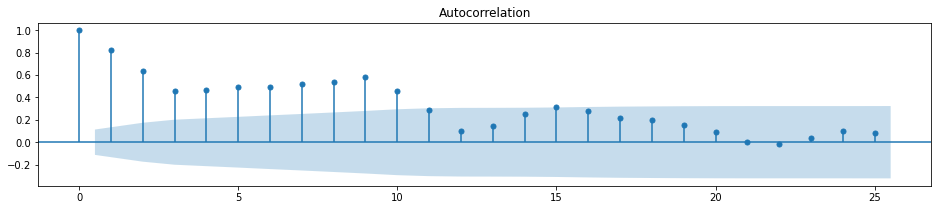

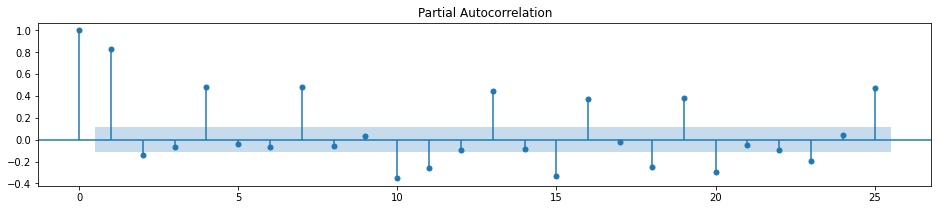

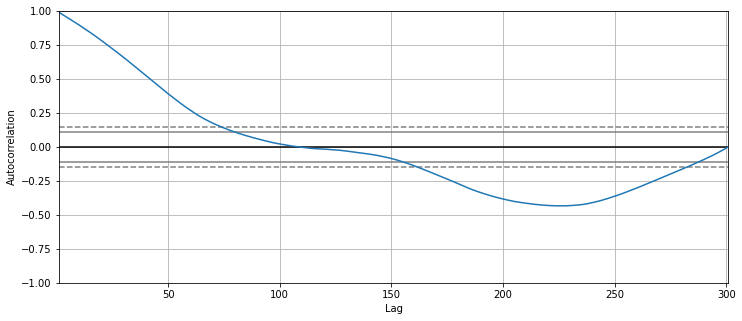

In [31]:
# ARMA prep, differancing, autocorrelation, and partial autocorrelation for zipcode: 97214
arma_97214 = arma_prep('zip: 97214')

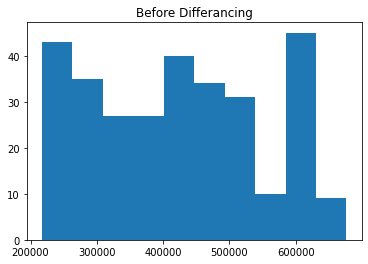

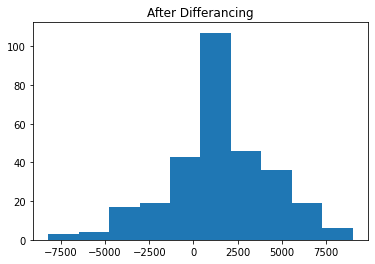

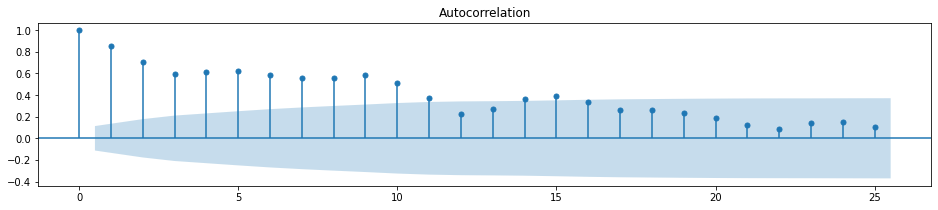

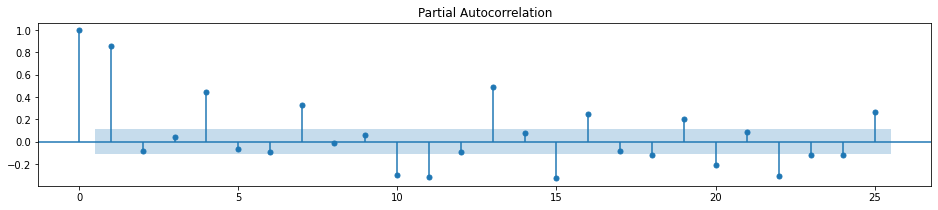

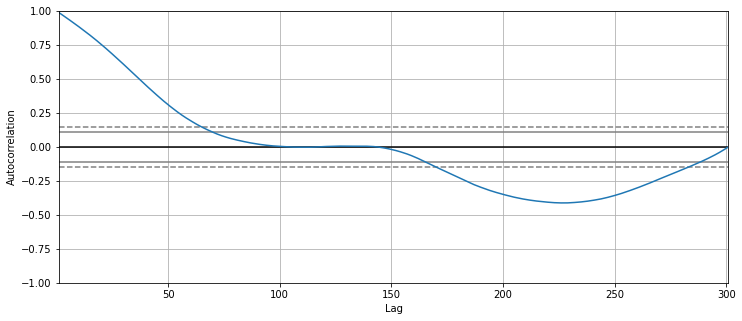

In [32]:
# ARMA prep, differancing, autocorrelation, and partial autocorrelation for zipcode: 97221
arma_97221 = arma_prep('zip: 97221')

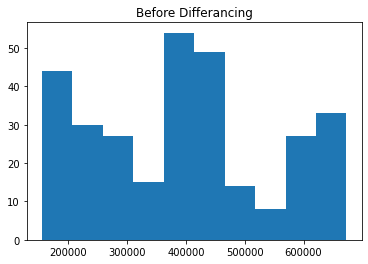

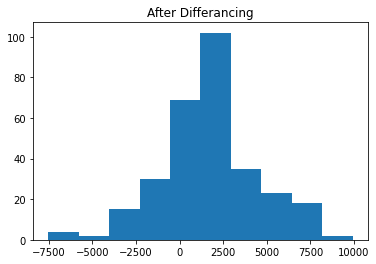

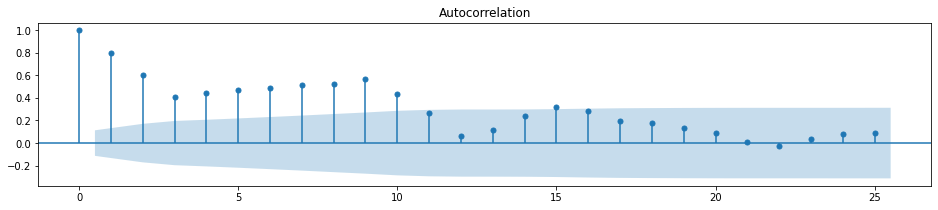

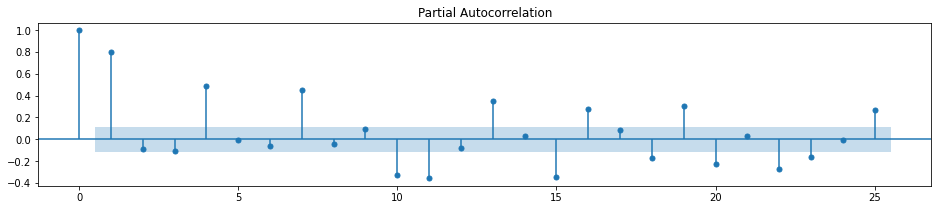

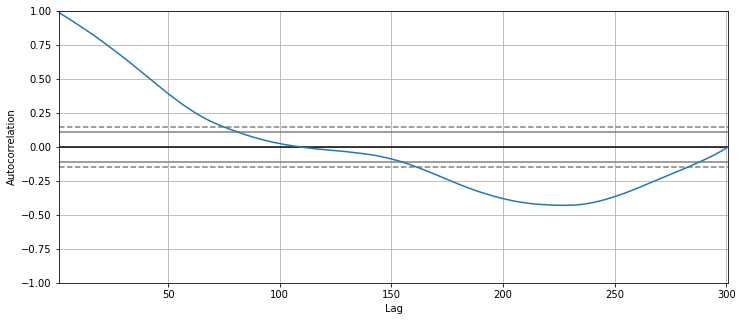

In [33]:
# ARMA prep, differancing, autocorrelation, and partial autocorrelation for zipcode: 97232
arma_97232 = arma_prep('zip: 97232')

# Modeling


## ARMA

### Train Test Split

Observations: 300
Training Observations: 270
Testing Observations: 30


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


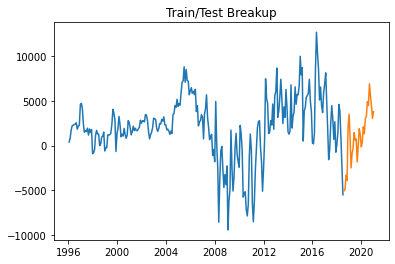

In [34]:
# Train test split for zip code 97210
train_97210, test_97210 = train_test_split(arma_97210)

Observations: 300
Training Observations: 270
Testing Observations: 30


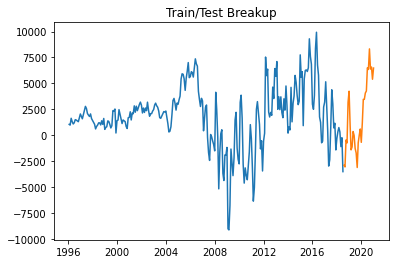

In [35]:
# Train test split for zip code 97212
train_97212, test_97212 = train_test_split(arma_97212)

Observations: 300
Training Observations: 270
Testing Observations: 30


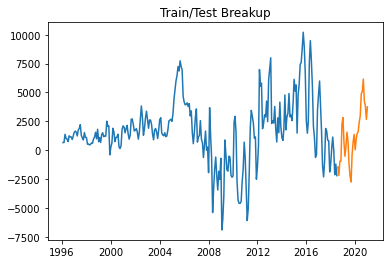

In [36]:
# Train test split for zip code 97214
train_97214, test_97214 = train_test_split(arma_97214)

Observations: 300
Training Observations: 270
Testing Observations: 30


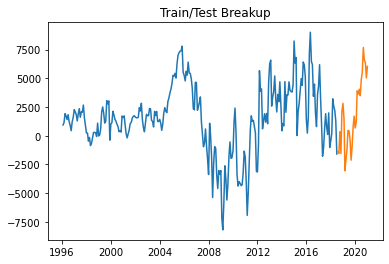

In [37]:
# Train test split for zip code 97221
train_97221, test_97221 = train_test_split(arma_97221)

Observations: 300
Training Observations: 270
Testing Observations: 30


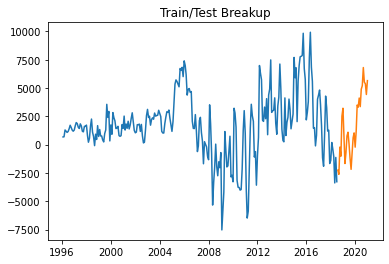

In [38]:
# Train test split for zip code 97232
train_97232, test_97232 = train_test_split(arma_97232)

### Model 

ARMA (1,0)Summary:

                              ARMA Model Results                              
Dep. Variable:              Avg_Price   No. Observations:                  270
Model:                     ARMA(1, 0)   Log Likelihood               -2442.042
Method:                       css-mle   S.D. of innovations           2046.086
Date:                Sun, 07 Mar 2021   AIC                           4890.084
Time:                        13:53:54   BIC                           4900.879
Sample:                    02-01-1996   HQIC                          4894.419
                         - 07-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1935.0181    646.378      2.994      0.003     668.140    3201.896
ar.L1.Avg_Price     0.8101      0.036     22.460      0.000       0.739       0.881
            

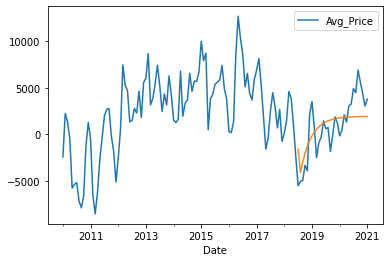

In [44]:
# ARMA model for zip code 97210
model_arma(train_97210, arma_97210)

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA (1,0)Summary:

                              ARMA Model Results                              
Dep. Variable:              Avg_Price   No. Observations:                  270
Model:                     ARMA(1, 0)   Log Likelihood               -2398.019
Method:                       css-mle   S.D. of innovations           1738.357
Date:                Sun, 07 Mar 2021   AIC                           4802.039
Time:                        13:53:59   BIC                           4812.834
Sample:                    02-01-1996   HQIC                          4806.374
                         - 07-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1760.9977    530.111      3.322      0.001     721.999    2799.996
ar.L1.Avg_Price     0.8033      0.036     22.100      0.000       0.732       0.874
            

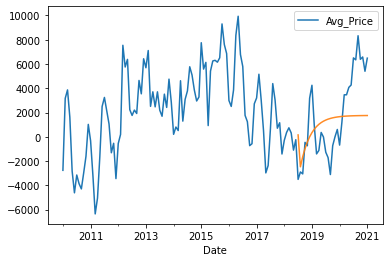

In [45]:
# ARMA model for zip code 97212
model_arma(train_97212, arma_97212)

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA (1,0)Summary:

                              ARMA Model Results                              
Dep. Variable:              Avg_Price   No. Observations:                  270
Model:                     ARMA(1, 0)   Log Likelihood               -2368.779
Method:                       css-mle   S.D. of innovations           1559.676
Date:                Sun, 07 Mar 2021   AIC                           4743.557
Time:                        13:53:59   BIC                           4754.352
Sample:                    02-01-1996   HQIC                          4747.892
                         - 07-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1600.0717    523.549      3.056      0.002     573.934    2626.210
ar.L1.Avg_Price     0.8216      0.035     23.806      0.000       0.754       0.889
            

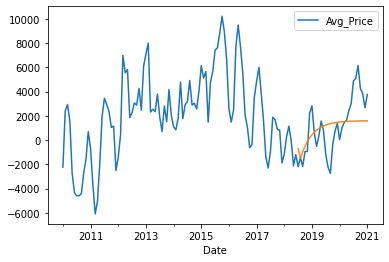

In [46]:
# ARMA model for zip code 97214
model_arma(train_97214, arma_97214)

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA (1,0)Summary:

                              ARMA Model Results                              
Dep. Variable:              Avg_Price   No. Observations:                  270
Model:                     ARMA(1, 0)   Log Likelihood               -2357.617
Method:                       css-mle   S.D. of innovations           1496.002
Date:                Sun, 07 Mar 2021   AIC                           4721.234
Time:                        13:54:00   BIC                           4732.030
Sample:                    02-01-1996   HQIC                          4725.569
                         - 07-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1445.7486    612.521      2.360      0.018     245.229    2646.268
ar.L1.Avg_Price     0.8545      0.031     27.400      0.000       0.793       0.916
            

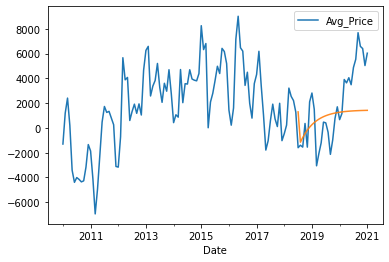

In [47]:
# ARMA model for zip code 97221
model_arma(train_97221, arma_97221)

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA (1,0)Summary:

                              ARMA Model Results                              
Dep. Variable:              Avg_Price   No. Observations:                  270
Model:                     ARMA(1, 0)   Log Likelihood               -2391.671
Method:                       css-mle   S.D. of innovations           1698.075
Date:                Sun, 07 Mar 2021   AIC                           4789.342
Time:                        13:54:00   BIC                           4800.137
Sample:                    02-01-1996   HQIC                          4793.677
                         - 07-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1644.5013    497.375      3.306      0.001     669.664    2619.338
ar.L1.Avg_Price     0.7950      0.037     21.486      0.000       0.722       0.868
            

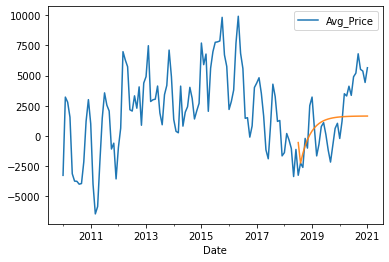

In [48]:
# ARMA model for zip code 97232
model_arma(train_97232, arma_97232)

## ARIMA

In [49]:
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [50]:
# Create Dataframes that the model will be run on
arima_97210 = temp.get_group(zip_focus[0]) 
arima_97212 = temp.get_group(zip_focus[1]) 
arima_97232 = temp.get_group(zip_focus[2])
arima_97214 = temp.get_group(zip_focus[3]) 
arima_97221 = temp.get_group(zip_focus[4])

In [51]:
# Set index to the date
arima_97210.set_index('Date', inplace=True)
arima_97212.set_index('Date', inplace=True)
arima_97232.set_index('Date', inplace=True)
arima_97214.set_index('Date', inplace=True)
arima_97221.set_index('Date', inplace=True)

In [52]:
# # Runs through the function to find the optimal 
# # pdq, pdqs based on the lowest aic. (commented out due to run time)

# temp_pdq_10 = best_pdq(train_97210, 3)
# temp_pdq_12 = best_pdq(train_97212, 3)
# temp_pdq_14 = best_pdq(train_97214, 3)
# temp_pdq_21 = best_pdq(train_97221, 3)
# temp_pdq_32 = best_pdq(train_97232, 3)

In [53]:
# # Print pdq, pdqs, and corresponding aic. 

# temp_pdq_10

# # 
# # pdq         (1, 1, 2)
# # pdqs    (2, 2, 2, 12)
# # aic           3868.99

In [54]:
# temp_pdq_12

# # pdq         (2, 0, 2)
# # pdqs    (2, 2, 2, 12)
# # aic           3812.43
# # Name: 566, dtype: object

In [55]:
# temp_pdq_14

# # pdq         (2, 0, 2)
# # pdqs    (2, 2, 2, 12)
# # aic           3739.48

In [56]:
# temp_pdq_21

# # pdq         (0, 1, 2)
# # pdqs    (2, 2, 2, 12)
# # aic           3778.14

In [57]:
# temp_pdq_32

# # pdq         (0, 1, 2)
# # pdqs    (2, 2, 2, 12)
# # aic           3828.61

In [58]:
# Set pdq, pdqs based on above.

# zip_97210
pdq_10 = (0, 2, 2)
pdqs_10 = (1, 0, 2, 12)

# zip_97212
pdq_12 = (2, 0, 2)
pdqs_12 = (2, 2, 2, 12)

# zip_97214
pdq_14 = (2, 0, 2)
pdqs_14 = (2, 2, 2, 12)

# zip_97221
pdq_21 = (0, 1, 2)
pdqs_21 = (2, 2, 2, 12)

# zip_97232
pdq_32 = (0, 1, 2)
pdqs_32 = (2, 2, 2, 12)

### Models

Observations: 301
Training Observations: 270
Testing Observations: 31


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


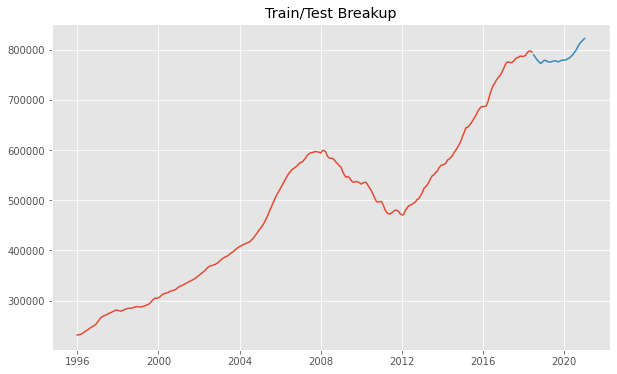

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2028      0.201      5.998      0.000       0.810       1.596
ma.L2          2.7558      0.425      6.485      0.000       1.923       3.589
ar.S.L12      -0.0902      0.051     -1.761      0.078      -0.191       0.010
ma.S.L12      -1.5882      0.158    -10.072      0.000      -1.897      -1.279
ma.S.L24       0.5702      0.099      5.757      0.000       0.376       0.764
sigma2      1.606e+05   5.42e+04      2.963      0.003    5.44e+04    2.67e+05


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


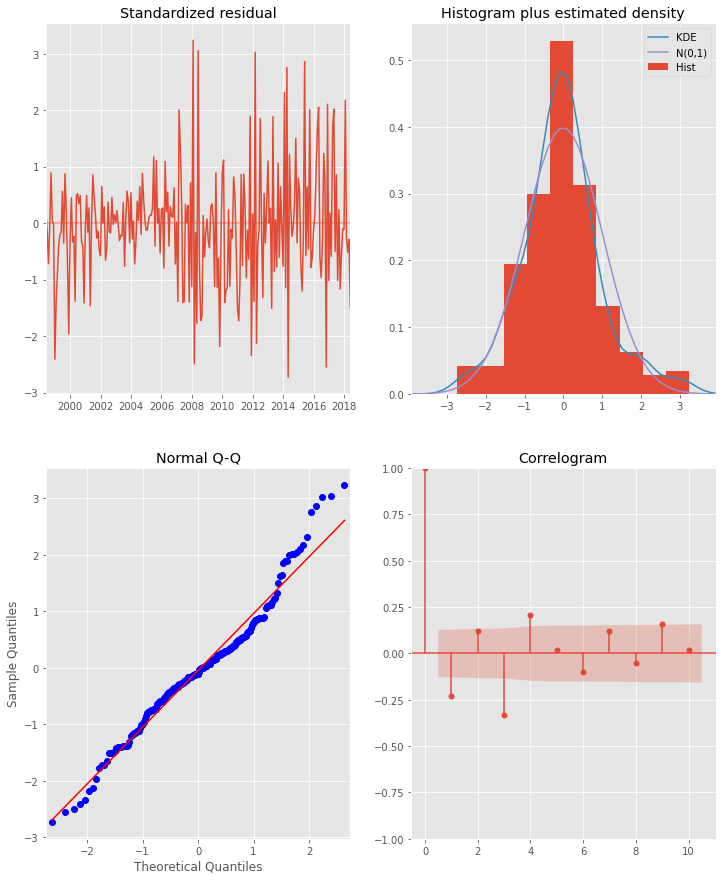

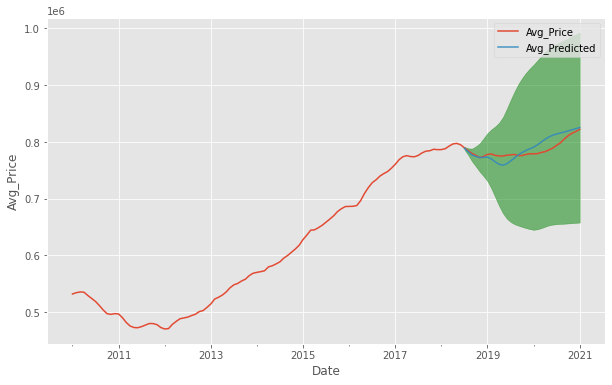

The MSE of our predictions is 144340611.02
The RMSE of our predictions is 12014.18


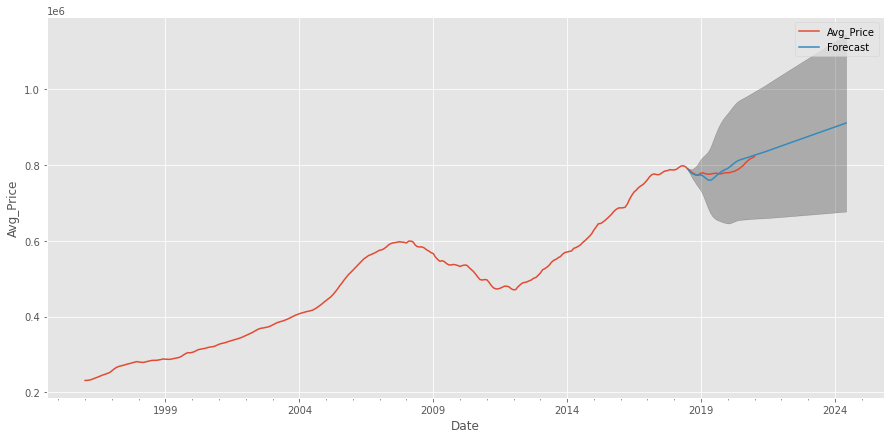

In [137]:
# Run the ARIMA model for zip 97210 and save the forecast and rmse. 
rmse_10, forecast_10 = arima(arima_97210, pdq_10, pdqs_10)

Observations: 301
Training Observations: 270
Testing Observations: 31


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


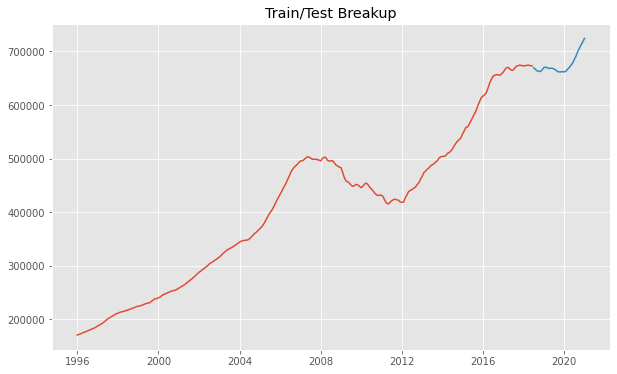

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5262      0.300      5.085      0.000       0.938       2.114
ar.L2         -0.5339      0.298     -1.793      0.073      -1.118       0.050
ma.L1          0.0821      0.336      0.245      0.807      -0.576       0.740
ma.L2          0.2208      0.173      1.274      0.203      -0.119       0.560
ar.S.L12      -0.8005      0.793     -1.010      0.312      -2.354       0.753
ar.S.L24      -0.1145      0.493     -0.232      0.817      -1.081       0.853
ma.S.L12      -0.5623      0.776     -0.725      0.468      -2.082       0.958
ma.S.L24      -0.1783      0.616     -0.289      0.772      -1.386       1.030
sigma2      2.276e+07   6.47e-08   3.52e+14      0.000    2.28e+07    2.28e+07


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


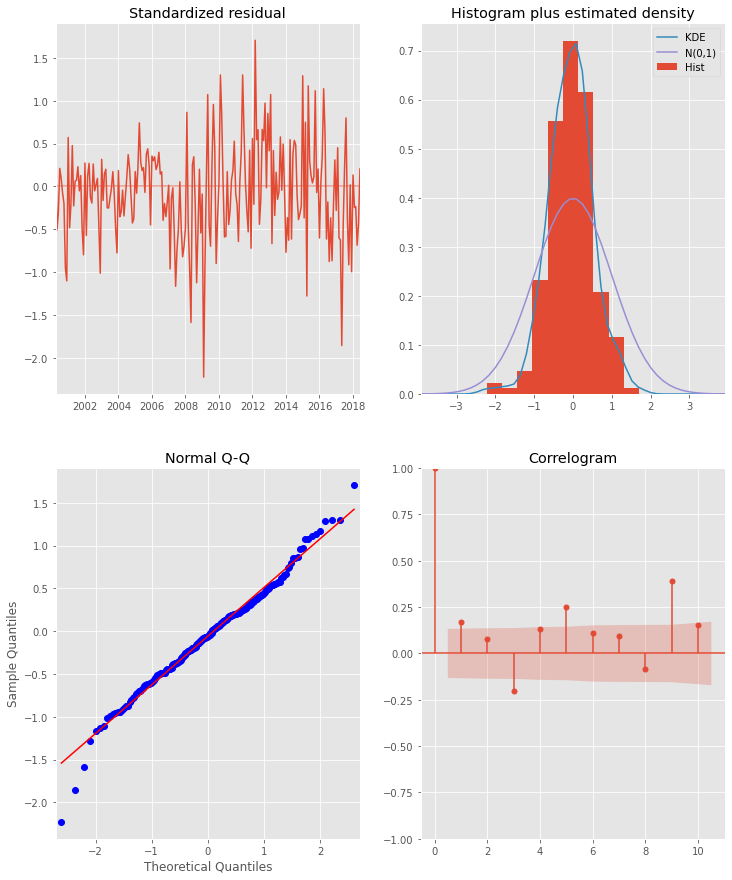

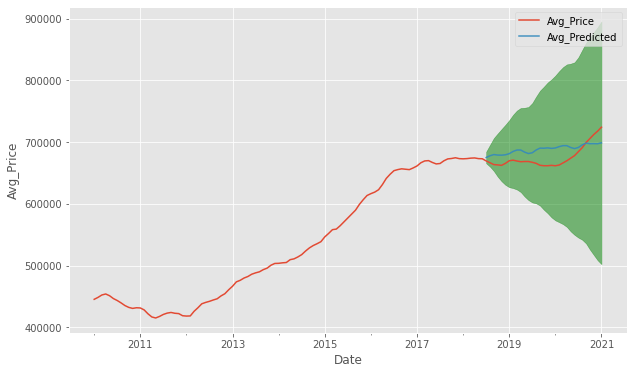

The MSE of our predictions is 366034627.3
The RMSE of our predictions is 19132.03


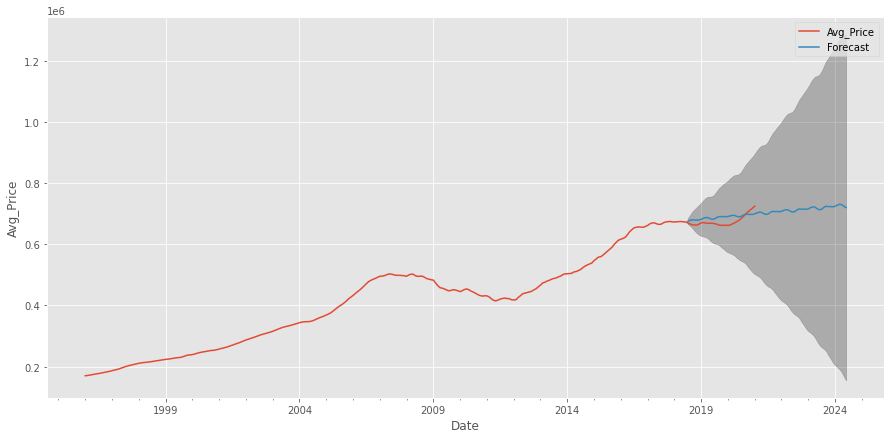

In [138]:
# Run the ARIMA model for zip 97212 and save the forecast and rmse
rmse_12, forecast_12 = arima(arima_97212, pdq_12, pdqs_12)

Observations: 301
Training Observations: 270
Testing Observations: 31


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


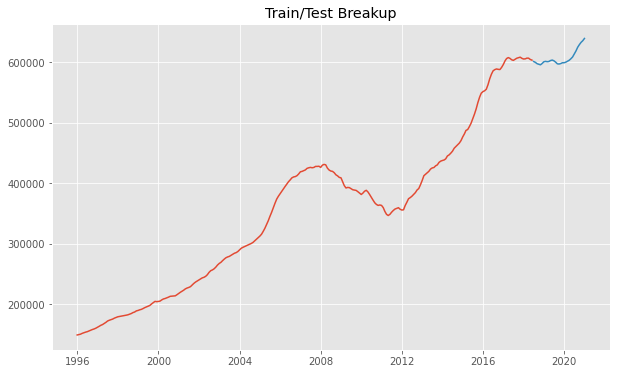

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3509      0.057     23.862      0.000       1.240       1.462
ar.L2         -0.3799      0.058     -6.508      0.000      -0.494      -0.266
ma.L1          0.2886      0.137      2.105      0.035       0.020       0.557
ma.L2          0.2327      0.127      1.827      0.068      -0.017       0.482
ar.S.L12      -1.3450      0.153     -8.816      0.000      -1.644      -1.046
ar.S.L24      -0.4913      0.159     -3.099      0.002      -0.802      -0.181
ma.S.L12       0.3167      0.060      5.279      0.000       0.199       0.434
ma.S.L24      -0.8342      0.050    -16.616      0.000      -0.933      -0.736
sigma2      2.003e+07   1.48e-09   1.35e+16      0.000       2e+07       2e+07


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


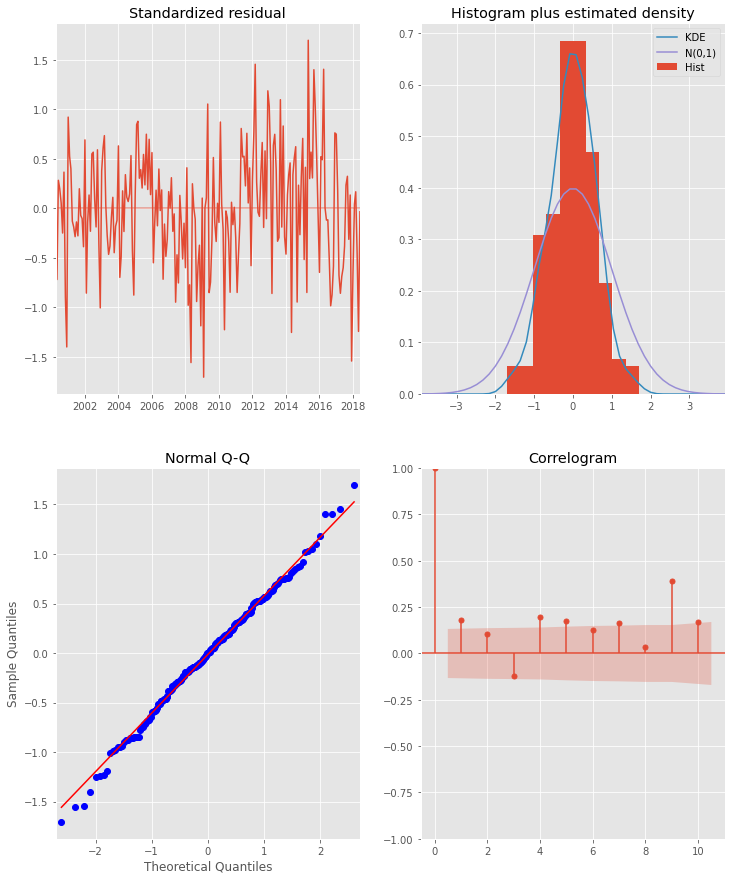

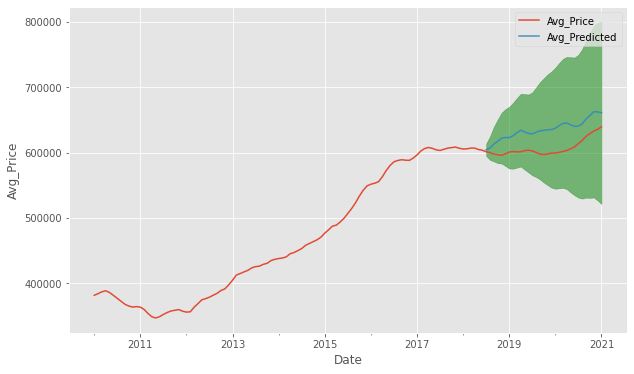

The MSE of our predictions is 884297182.83
The RMSE of our predictions is 29737.13


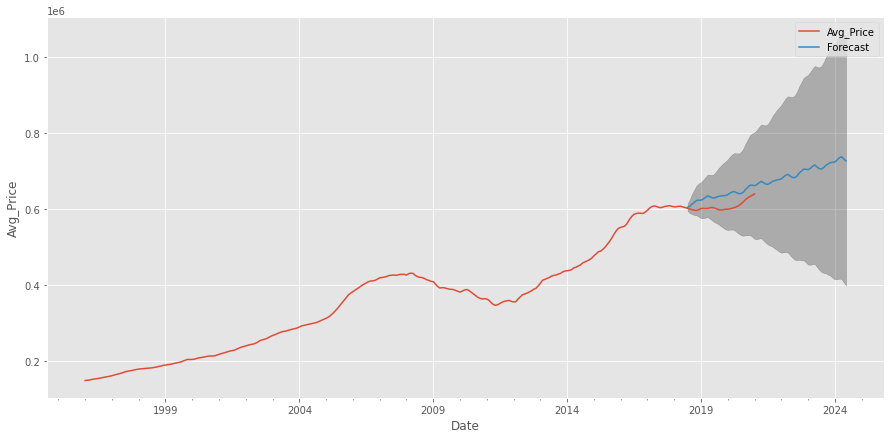

In [139]:
# Run the ARIMA model for zip 97214 and save the forecast and rmse 
rmse_14, forecast_14 = arima(arima_97214, pdq_14, pdqs_14)

Observations: 301
Training Observations: 270
Testing Observations: 31


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


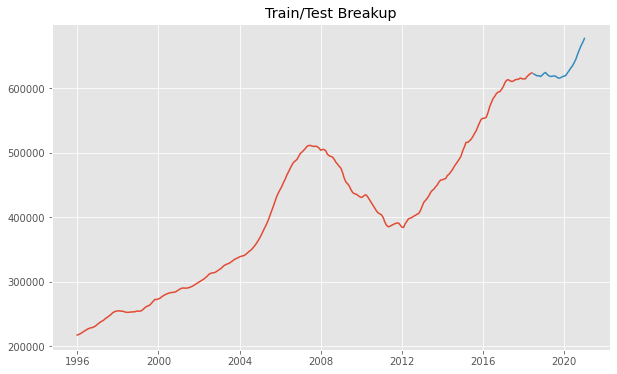

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6579      0.164      4.013      0.000       0.337       0.979
ma.L2          0.3833      0.124      3.087      0.002       0.140       0.627
ar.S.L12      -1.2142      0.633     -1.918      0.055      -2.455       0.027
ar.S.L24      -0.3990      0.417     -0.957      0.338      -1.216       0.418
ma.S.L12      -0.0695      0.564     -0.123      0.902      -1.175       1.036
ma.S.L24      -0.5201      0.428     -1.215      0.224      -1.359       0.319
sigma2      1.842e+07    1.3e-08   1.42e+15      0.000    1.84e+07    1.84e+07


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


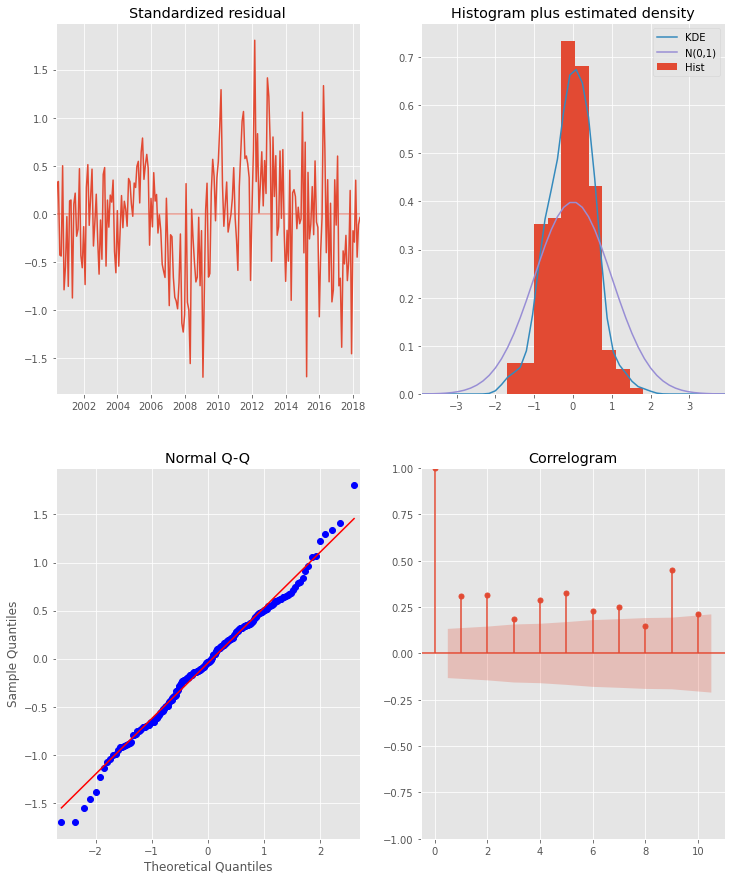

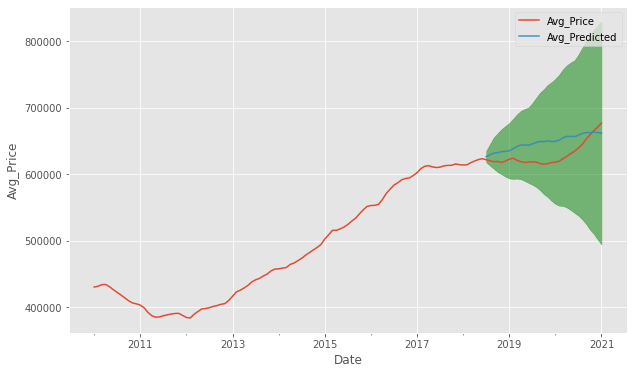

The MSE of our predictions is 507968226.6
The RMSE of our predictions is 22538.15


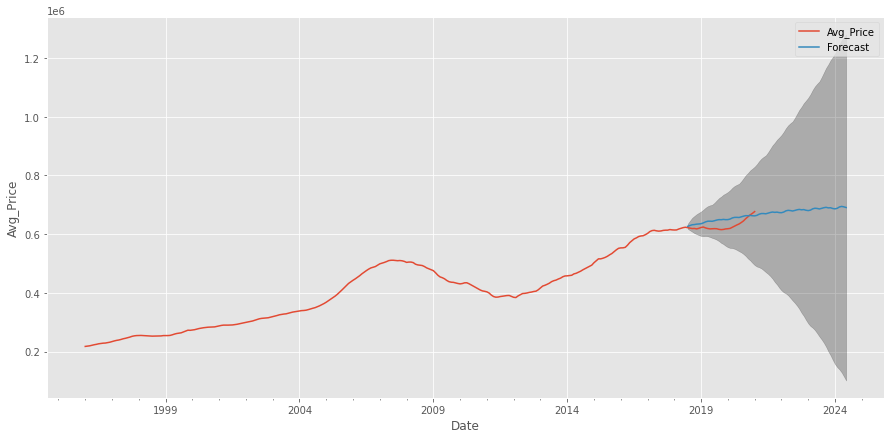

In [140]:
# Run the ARIMA model for zip 97221 and save the forecast and rmse
rmse_21, forecast_21 = arima(arima_97221, pdq_21, pdqs_21)

Observations: 301
Training Observations: 270
Testing Observations: 31


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


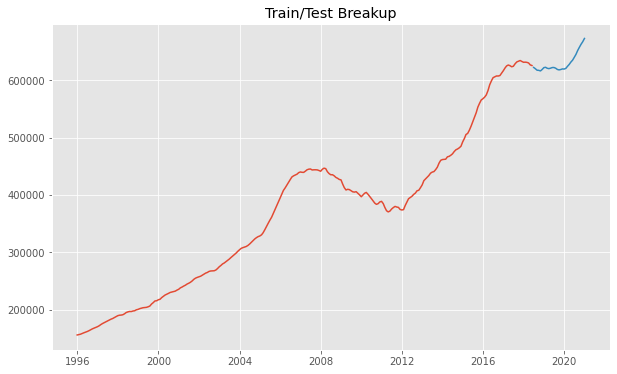

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5424      0.058      9.329      0.000       0.428       0.656
ma.L2          0.3248      0.063      5.179      0.000       0.202       0.448
ar.S.L12      -1.5896      0.063    -25.184      0.000      -1.713      -1.466
ar.S.L24      -0.6836      0.056    -12.317      0.000      -0.792      -0.575
ma.S.L12       0.1481      0.046      3.235      0.001       0.058       0.238
ma.S.L24      -0.6538      0.050    -13.040      0.000      -0.752      -0.556
sigma2      8.387e+06   2.41e-09   3.48e+15      0.000    8.39e+06    8.39e+06


/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


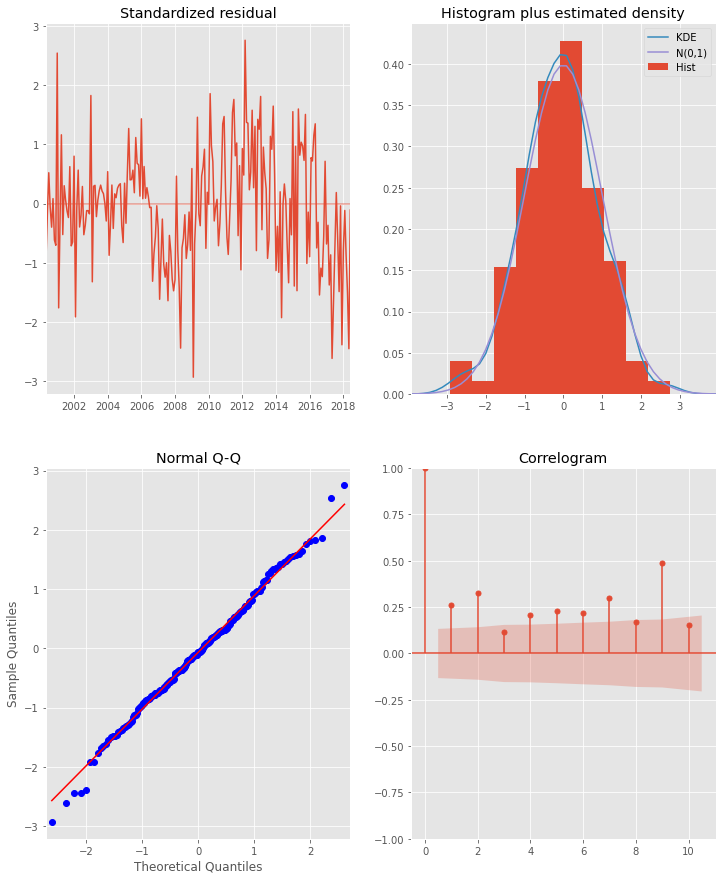

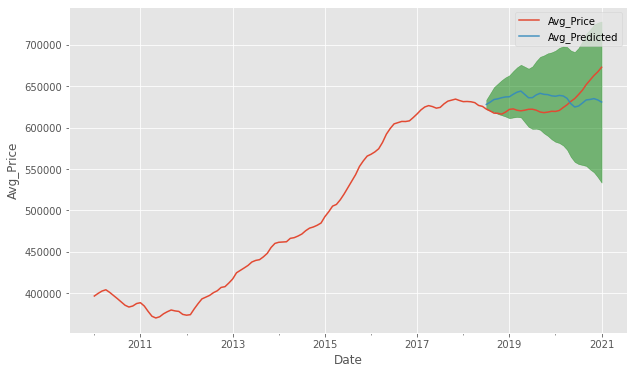

The MSE of our predictions is 385480784.48
The RMSE of our predictions is 19633.66


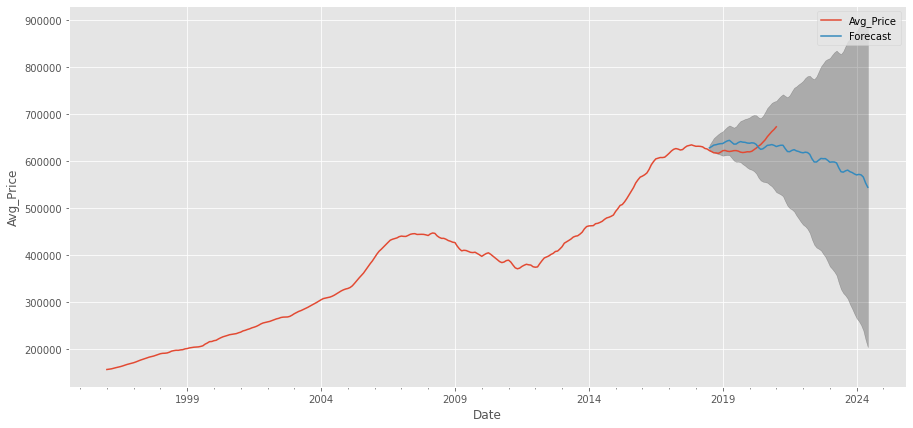

In [141]:
# Run the ARIMA model for zip 97232 and save the forecast and rmse
rmse_32, forecast_32 = arima(arima_97232, pdq_32, pdqs_32)

### Return on Investment

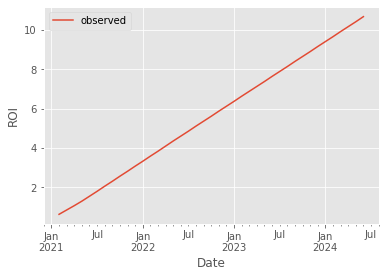

12014.183743421032


2023-09-01     8.40
2023-10-01     8.65
2023-11-01     8.90
2023-12-01     9.16
2024-01-01     9.41
2024-02-01     9.66
2024-03-01     9.92
2024-04-01    10.17
2024-05-01    10.42
2024-06-01    10.68
Freq: MS, dtype: float64

In [142]:
# Run ROI fuction for 97210 and save to a variable. Print the tail.

ROI_10 = ROI(forecast_10, arima_97210, '2021-01-01')
print(rmse_10)
ROI_10.tail(10)

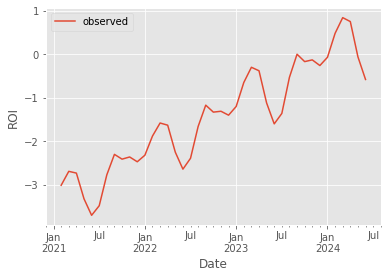

19132.031447220725


2023-09-01    0.00
2023-10-01   -0.17
2023-11-01   -0.13
2023-12-01   -0.26
2024-01-01   -0.07
2024-02-01    0.48
2024-03-01    0.84
2024-04-01    0.75
2024-05-01   -0.06
2024-06-01   -0.58
Freq: MS, dtype: float64

In [143]:
# Run ROI fuction for 97212 and save to a variable. Print the tail.

ROI_12 = ROI(forecast_12, arima_97212, '2021-01-01')
print(rmse_12)
ROI_12.tail(10)

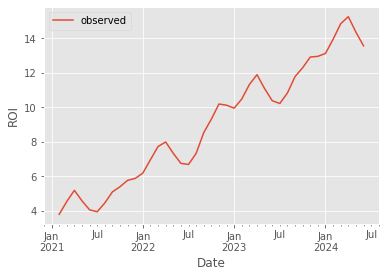

29737.13474476295


2023-09-01    11.78
2023-10-01    12.29
2023-11-01    12.91
2023-12-01    12.95
2024-01-01    13.12
2024-02-01    13.94
2024-03-01    14.84
2024-04-01    15.25
2024-05-01    14.35
2024-06-01    13.56
Freq: MS, dtype: float64

In [144]:
# Run ROI fuction for 97214 and save to a variable. Print the tail.

ROI_14 = ROI(forecast_14, arima_97214, '2021-01-01')
print(rmse_14)
ROI_14.tail(10)

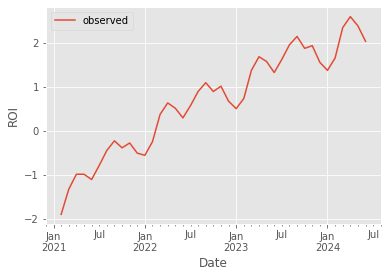

22538.150469760723


2023-09-01    2.14
2023-10-01    1.87
2023-11-01    1.93
2023-12-01    1.55
2024-01-01    1.37
2024-02-01    1.65
2024-03-01    2.34
2024-04-01    2.59
2024-05-01    2.38
2024-06-01    2.03
Freq: MS, dtype: float64

In [145]:
# Run ROI fuction for 97221 and save to a variable. Print the tail.

ROI_21 = ROI(forecast_21, arima_97221, '2021-01-01')
print(rmse_21)
ROI_21.tail(10)

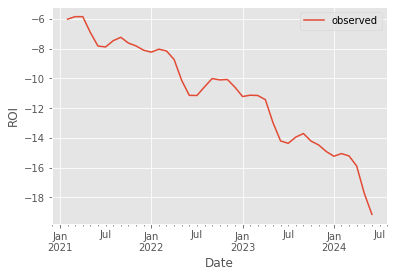

19633.66457079137


2023-09-01   -13.71
2023-10-01   -14.22
2023-11-01   -14.48
2023-12-01   -14.92
2024-01-01   -15.24
2024-02-01   -15.06
2024-03-01   -15.22
2024-04-01   -15.90
2024-05-01   -17.74
2024-06-01   -19.15
Freq: MS, dtype: float64

In [146]:
# Run ROI fuction for 97232 and save to a variable. Print the tail.

ROI_32 = ROI(forecast_32, arima_97232, '2021-01-01')
print(rmse_32)
ROI_32.tail(10)

# Step 6: Interpreting Results

## Recommendations:

The zip code with the best Return on Investment estimate is 97214, but it has a highest rmse meaning the forecast used to calculate possible ROI may not be as reliable. High risk but a chance of a high reward. 

Zip code 97210 has the lowest rmse of 12014.18 making it the most reliable model of the focus zip codes but also has a lower ROI.  

Zip code 97221 is had an ROI that is gradually moving upwards, meaning it might be good for a longer term investment. 



 

## Next Steps:

- Find more in depth data on our focus zipcodes => data that includes things such as:
     - Number of bedrooms/bathrooms
     - Condition of home
     - Square footage
     - Type of home
     - Etc...
- Run models to see what attributes we should look for in a house when buying/selling in desired zipcodes.
- Find fixer-uppers and compare price before/after renovation. 